# Regresion lineal
creado por Marco Jurado 20308


### >> Abrir el csv

In [24]:
import csv
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    datacsv = []
    for row in csv_reader:
        datacsv.append(row)

In [25]:
print(' Elementos en el dataset \n',datacsv[0:1])
print('\n\n Primeros cinco elementos del dataset \n',datacsv[1:5])
print('\n\n Ulitmos cinco elementos del dataset \n',datacsv[-5:])
print('\n\n Data tiene un size the ',len(datacsv))

 Elementos en el dataset 
 [['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]


 Primeros cinco elementos del dataset 
 [['7129300520', '20141013T000000', '221900', '3', '1', '1180', '5650', '1', '0', '0', '3', '7', '1180', '0', '1955', '0', '98178', '47.5112', '-122.257', '1340', '5650'], ['6414100192', '20141209T000000', '538000', '3', '2.25', '2570', '7242', '2', '0', '0', '3', '7', '2170', '400', '1951', '1991', '98125', '47.721', '-122.319', '1690', '7639'], ['5631500400', '20150225T000000', '180000', '2', '1', '770', '10000', '1', '0', '0', '3', '6', '770', '0', '1933', '0', '98028', '47.7379', '-122.233', '2720', '8062'], ['2487200875', '20141209T000000', '604000', '4', '3', '1960', '5000', '1', '0', '0', '5', '7', '1050', '910', '1965', '0', '98136', '47.5208', '-122.393', '1360', '50

crear arreglo de numpy con instruccion de genfromtxt

In [26]:
import numpy as np
data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

Ahora limpio las dos variables de price y sqft living

In [27]:
data = data[~np.isnan(data[:,2])] # price
data = data[~np.isnan(data[:,5])] # sqft living
data.shape


(21613, 21)

Funciones que serán utiles tanto para regresió lineal como para gradiente. 

In [28]:
norm = lambda v: (sum(v**2))**0.5
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

Function de Regresion Lineal <br>
Segun fue visto en clase

In [29]:
def regLineal(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    
    return t, costs

Function de Gradiente vista en clase

In [30]:
def gradient_descent(theta, X, y, funcionCostos, costoGradiente, learning_rate=0.01, threshold=0.001, max_iter=10000):
    tempTheta = theta
    i = 0
    costs, norms = [], []
    while np.linalg.norm(costoGradiente(tempTheta, X, y, 0.1)) > threshold and i < max_iter:
        tempTheta -= learning_rate * costoGradiente(tempTheta, X, y, 0.1)
        i += 1
        costs.append(funcionCostos(tempTheta, X, y, 0.1))
        norms.append(tempTheta.copy())

    return tempTheta, costs, norms

Function de costo linear

In [31]:
def costoLinear(theta, X, y, lmbd):
    return (( (X @ theta) - y) ** 2).sum() / (2 * len(X)) + ((lmbd / (2 * len(X))) * (theta[1:] ** 2).sum())

Function de costo gradiente

In [32]:
def costoGradiente(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

### >> Modelo de regresión lineal

Primero separamos X y Y. Siendo estas:
- price
- sqft living

In [33]:
X = data[:, 2].reshape(-1, 1)
Y = data[:, 5].reshape(-1, 1)

ahora hay que calcular el Xr

In [34]:
Xr = np.column_stack((np.ones((len(X), 1)), X.reshape(-1, 1))).reshape(-1,2)

ahora el primer valor que tomara el theta

In [35]:
theta_0 = np.random.rand(Xr.shape[1])
theta_0 = theta_0[~np.isnan(theta_0)].reshape(-1, 1)

Ahora se calcula la regresion lineal

In [36]:
thetaf, cost = regLineal(Xr, Y, theta_0, cost, grad, a=0.025, n=100)

C:\Users\marco\AppData\Local\Temp\ipykernel_40136\1767679890.py:2: RuntimeWarning: overflow encountered in square
  cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
C:\Users\marco\AppData\Local\Temp\ipykernel_40136\1767679890.py:3: RuntimeWarning: overflow encountered in matmul
  grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)
C:\Users\marco\AppData\Local\Temp\ipykernel_40136\2859185945.py:4: RuntimeWarning: invalid value encountered in subtract
  t -= a * grad(X, y, t)


Ahora tenemos el valor de Xm

In [37]:
xmr = np.array([[1, 0], [1, len(X)]])

Finalmente demostramos los resultados graficamente

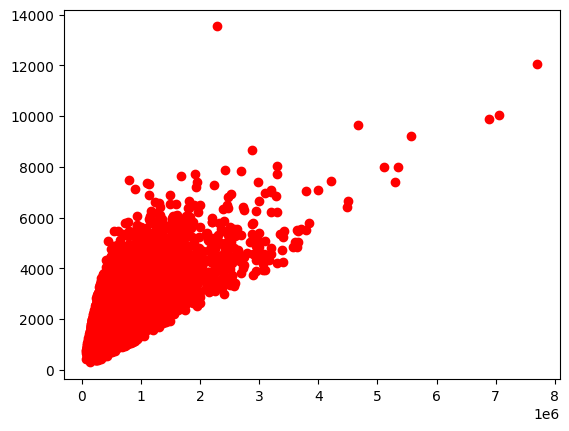

In [38]:
import matplotlib.pyplot as plt
plt.plot(Xr[:,1], Y, 'ro')
plt.plot(np.array([[0], [len(X)]]), xmr @ thetaf)
plt.show()

### Modelo con decenso de gradiente
repetimos el modelo pero utilizando la función de decenso de gradiente vista en clase

In [39]:
import numpy as np
data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [40]:
X = data[:, 2].reshape(-1, 1)
Y = data[:, 5].reshape(-1, 1)
m, n = X.shape

In [47]:
m

21613

In [48]:
n

1

ahora primer valor de theta

In [50]:
theta_0 = np.random.rand(n, 1)
theta_init = np.zeros((n, 1))

Ahora se calcula con el gradient descent

In [43]:
X.size

21613

In [44]:
X.shape

(21613, 1)

In [46]:
theta_0.shape

(1, 1)

In [51]:
theta_init.shape

(1, 1)

In [42]:
r_theta, costs, thetas = gradient_descent(X, Y, theta_0, costoLinear, costoGradiente, learning_rate=0.00000001, threshold=0.001, max_iter=10000)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21613 is different from 1)